In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C:\Users\SURAJ KASULA\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv(r"C:\Users\SURAJ KASULA\Downloads\Dataset.csv")

In [3]:
print(data['Aggregate rating'].unique())


[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


In [4]:
X = data[['Votes']]
y = data['Aggregate rating']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
print(y_pred)

[2.54119018 2.57545264 2.52063271 ... 2.8918093  2.47951776 2.51834854]


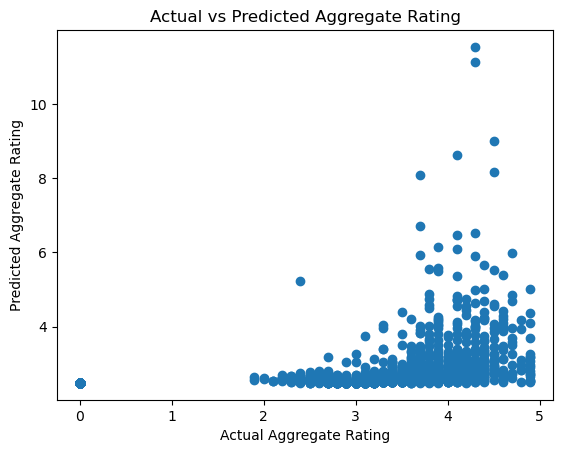

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs Predicted Aggregate Rating')
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
y_pred = model1.predict(X_test)
print(y_pred)

[3.125      3.42352941 3.16666667 ... 3.8        0.         3.23333333]


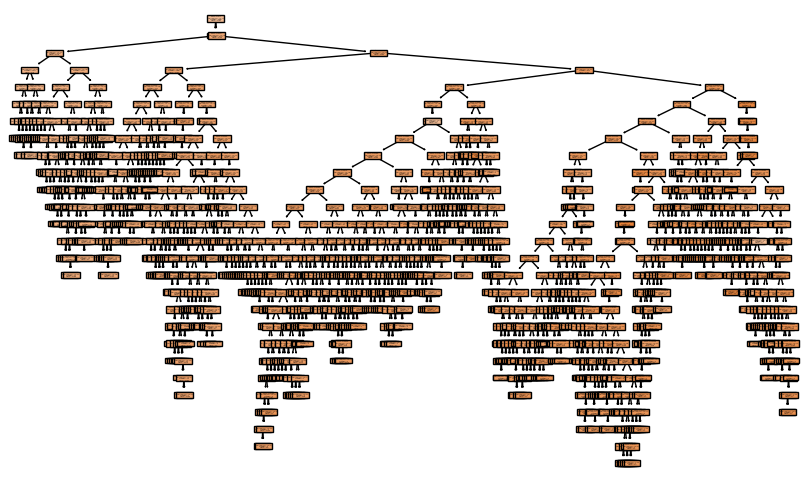

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model1, filled=True, feature_names=X.columns)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = rf.predict(X_test)
print(y_pred)

[3.12492267 3.43897428 3.1712256  ... 3.80962118 0.         3.23840549]


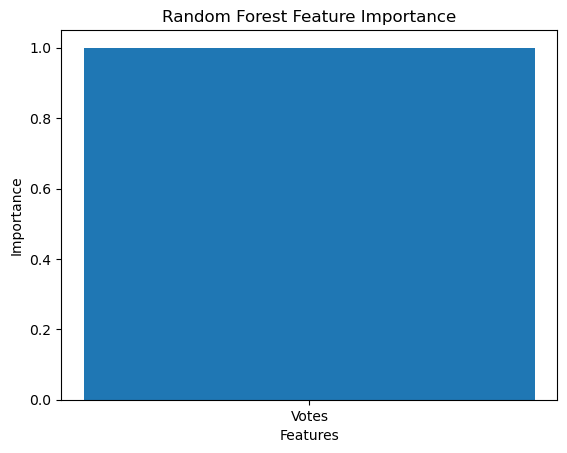

In [17]:
feature_importance = rf.feature_importances_
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# TASK 2 

In [18]:
from scipy.stats import ttest_ind

In [19]:
rating = {'Bad': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}
data['Rating text'] = data['Rating text'].map(rating)

In [20]:
ratings= data.groupby('Cuisines')['Rating text'].mean().sort_values(ascending=False)

In [21]:
print(ratings)

Cuisines
Scottish, Cafe                                 5.0
Burger, Bar Food, Steak                        5.0
American, Seafood, Cajun                       5.0
Cajun                                          5.0
Burger, American, Fast Food, Italian, Pizza    5.0
                                              ... 
Tibetan                                        NaN
Tibetan, Chinese, North Indian                 NaN
Tibetan, South Indian, North Indian            NaN
Tibetan, Street Food                           NaN
Turkish, Arabian, Moroccan, Lebanese           NaN
Name: Rating text, Length: 1825, dtype: float64


In [22]:
contingency_table = pd.crosstab(data['Cuisines'], data['Rating text'])

In [23]:
print(contingency_table)

Rating text                      2.0  3.0  4.0  5.0
Cuisines                                           
Afghani                            1    0    0    0
African                            0    0    0    1
African, Portuguese                0    0    1    0
American                           2    9   14    3
American, Asian, Burger            0    0    0    1
...                              ...  ...  ...  ...
Western, Asian, Cafe               0    0    1    0
Western, Fusion, Fast Food         1    0    0    0
World Cuisine                      0    0    0    1
World Cuisine, Mexican, Italian    0    0    1    0
World Cuisine, Patisserie, Cafe    0    0    1    0

[1697 rows x 4 columns]


In [24]:
relation_coefficient = data['Cuisines'].astype('category').cat.codes.corr(data['Rating text'])
print(relation_coefficient)

-0.14318189848659346


In [25]:
ratingst= data.groupby('Cuisines')['Rating text'].mean().sort_values(ascending=True)
print(ratingst)

Cuisines
Afghani                                                                           2.0
Mithai, Street Food, North Indian, South Indian, Chinese, Fast Food, Beverages    2.0
Cafe, North Indian, Continental                                                   2.0
Cafe, North Indian, Chinese, South Indian                                         2.0
Mithai, Street Food, South Indian, Chinese, North Indian                          2.0
                                                                                 ... 
Tibetan                                                                           NaN
Tibetan, Chinese, North Indian                                                    NaN
Tibetan, South Indian, North Indian                                               NaN
Tibetan, Street Food                                                              NaN
Turkish, Arabian, Moroccan, Lebanese                                              NaN
Name: Rating text, Length: 1825, dtype: float

In [26]:
group = data.groupby('Cuisines')['Rating text'].mean().reset_index()

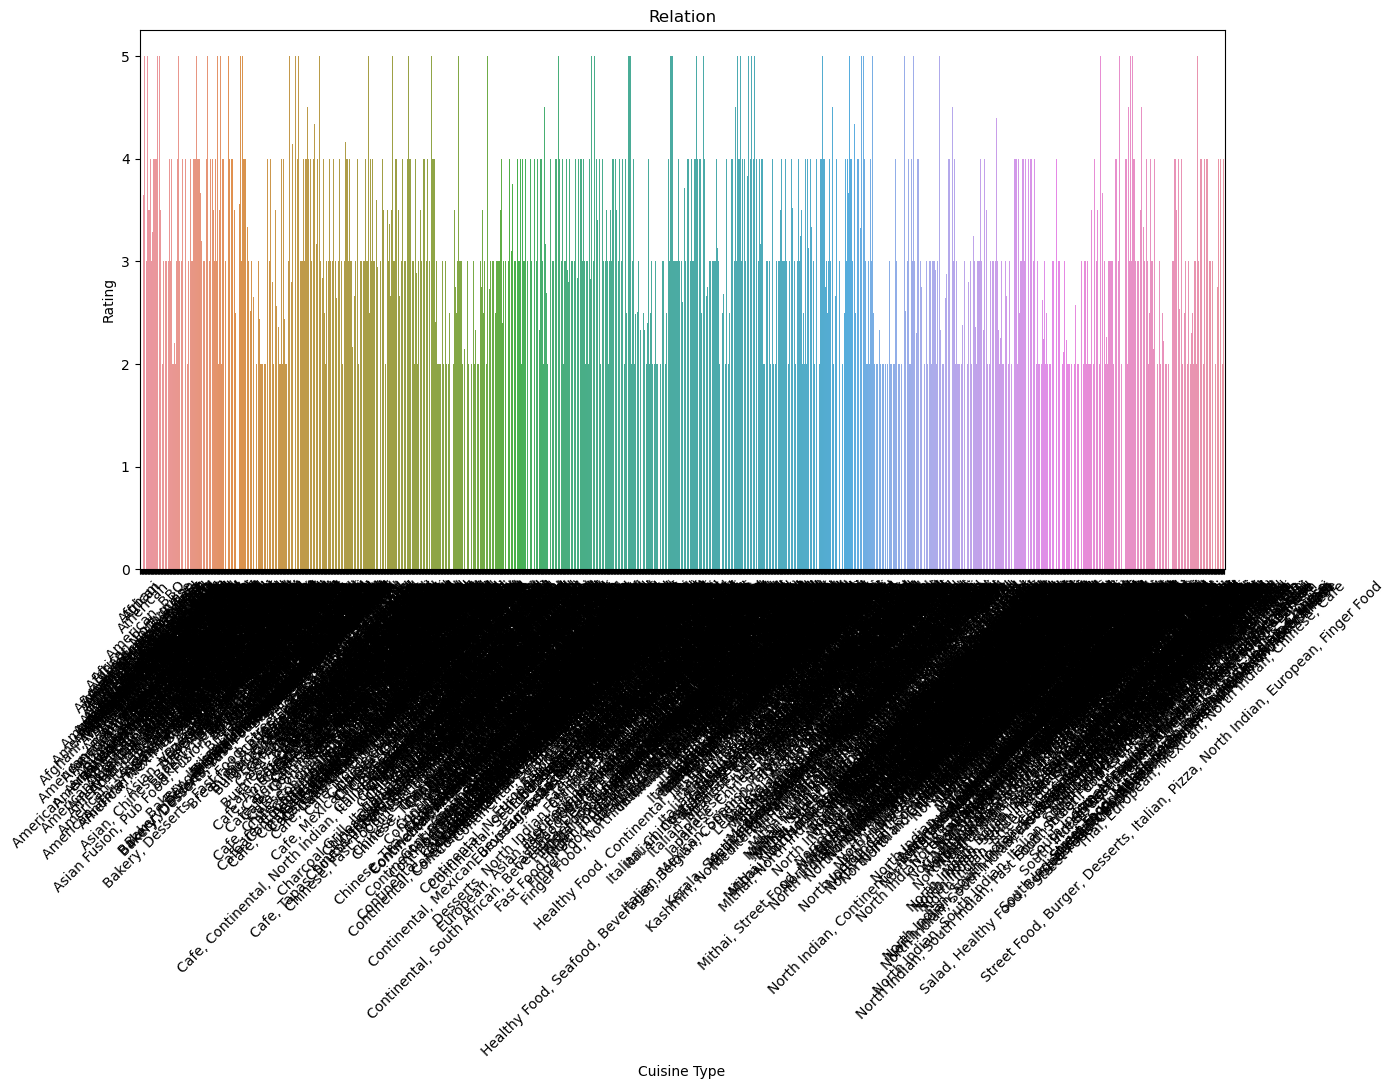

In [27]:
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.barplot(x='Cuisines', y='Rating text', data=group, ci=None)
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.title('Relation')
plt.show()

In [28]:
votes = data.groupby('Cuisines')['Votes'].sum()

In [29]:
popular = votes.nlargest(5)


In [30]:
print(popular)

Cuisines
North Indian, Mughlai    53747
North Indian             46241
North Indian, Chinese    42012
Cafe                     30657
Chinese                  21925
Name: Votes, dtype: int64


In [31]:
total = votes.sort_values(ascending=False)
print(total)

Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64


In [32]:
high_rating= data.groupby('Cuisines')['Rating text'].mean()

In [33]:
top = high_rating.nlargest(5)
print(top)

Cuisines
African                               5.0
American, Asian, Burger               5.0
American, Asian, European, Seafood    5.0
American, Asian, Italian, Seafood     5.0
American, BBQ, Sandwich               5.0
Name: Rating text, dtype: float64


# TASK 3 

In [34]:
import seaborn as sns

In [35]:
data1 = pd.DataFrame({
    'Cuisine': ['Italian', 'Chinese', 'American', 'Asian', 'Mexican', 'Japanese'],
    'Rating': [4.5, 3.8, 4.2, 4.0, 4.7, 4.1]
})


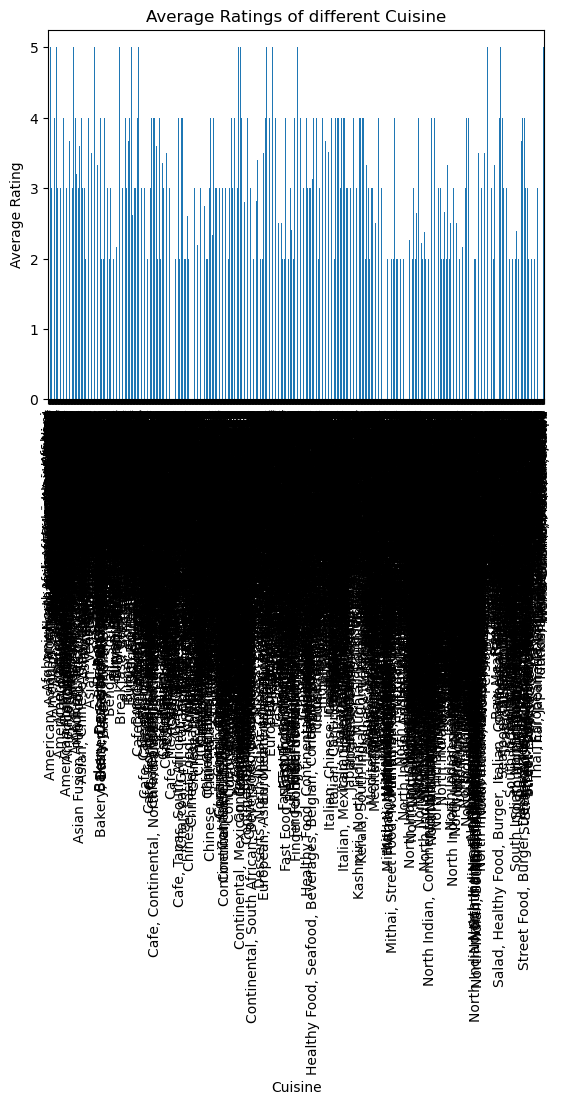

In [38]:
avg_ratings_cuisine = data.groupby('Cuisines')['Rating text'].mean()
avg_ratings_cuisine.plot(kind='bar', 
                                title='Average Ratings of different Cuisine', 
                                xlabel='Cuisine', 
                                ylabel='Average Rating')
plt.show()

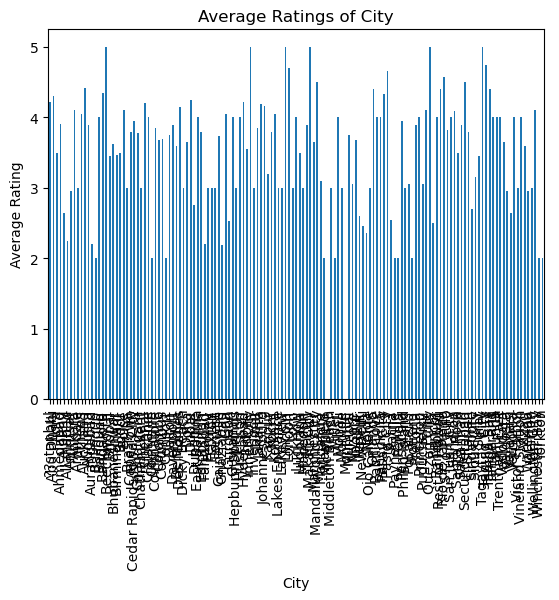

In [39]:
avg_ratings_city = data.groupby('City')['Rating text'].mean()
avg_ratings_city.plot(kind='bar', title='Average Ratings of City', xlabel='City', ylabel='Average Rating')
plt.show()

In [40]:
import numpy as np

In [44]:
data = {'Rating text': np.random.randint(1, 11, size=100)}

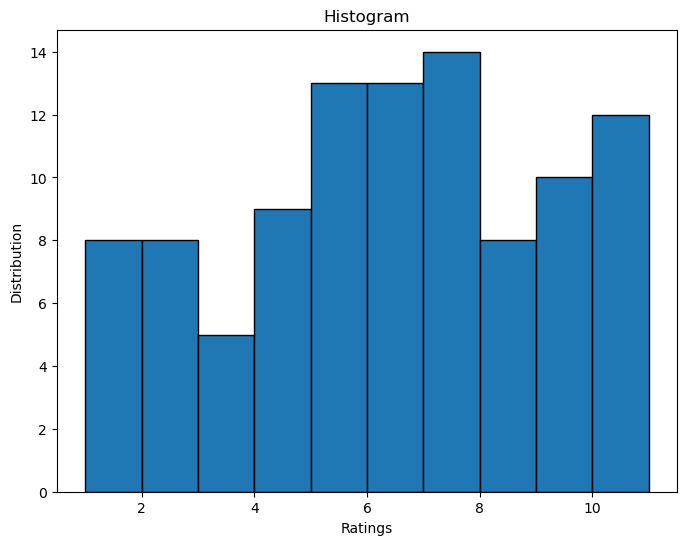

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(data['Rating text'], bins=range(1, 12), edgecolor='black')
plt.title('Histogram')
plt.xlabel('Ratings')
plt.ylabel('Distribution')
plt.show()


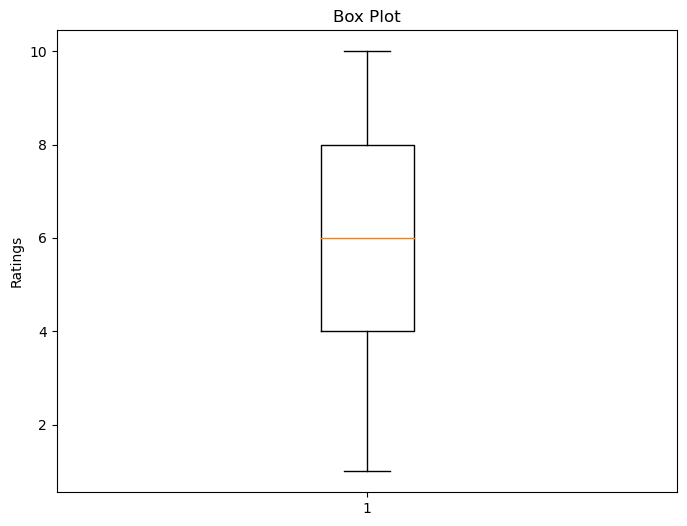

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Rating text'])
plt.title('Box Plot')
plt.ylabel('Ratings')
plt.show()

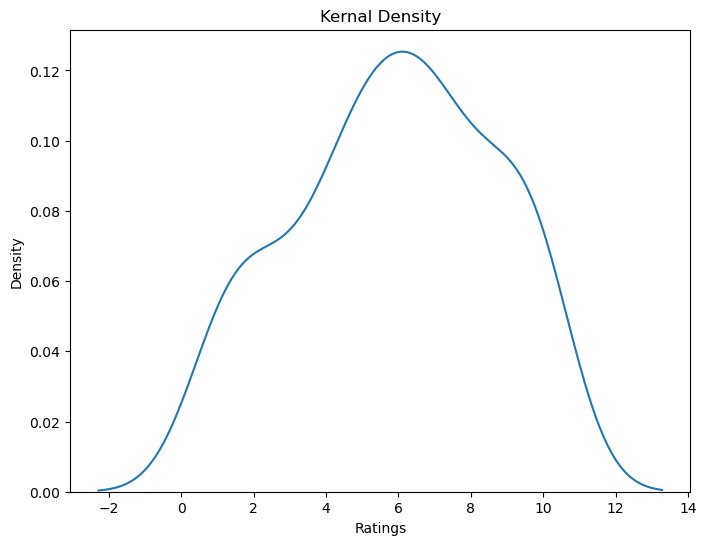

In [55]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Rating text'])
plt.title('Kernal Density')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

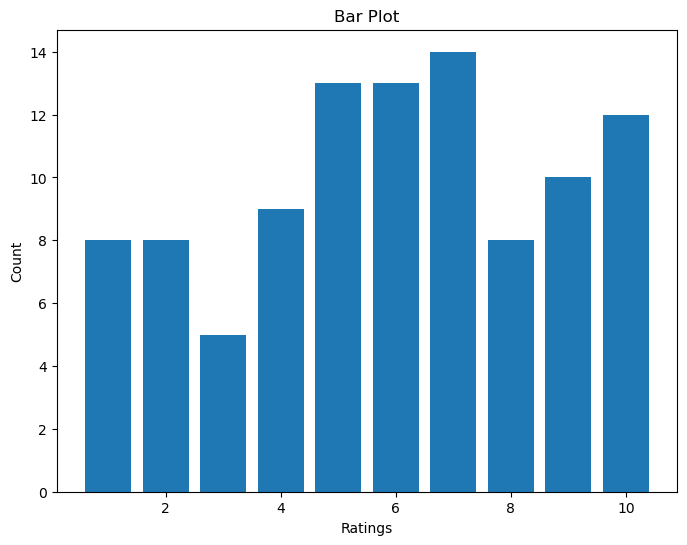

In [60]:
plt.figure(figsize=(8, 6))
unique_ratings, counts = np.unique(data['Rating text'], return_counts=True)
plt.bar(unique_ratings, counts)
plt.title('Bar Plot')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()